**FIFA 19 Data Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\uttam\Downloads\fifa19.csv")
df.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


C:\Users\uttam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


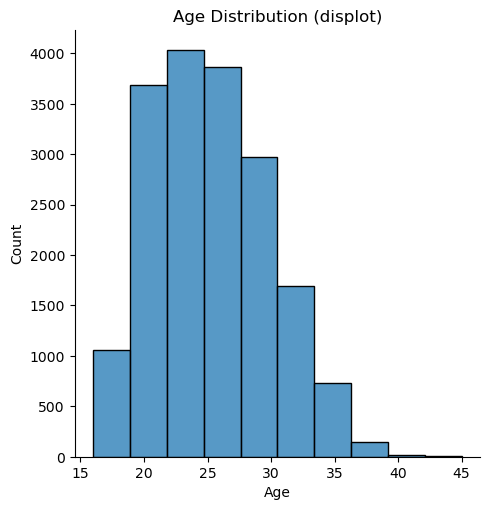

In [2]:
# 1. Age Distribution(distplot)
sns.displot(df['Age'],bins = 10)
plt.title("Age Distribution (displot)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

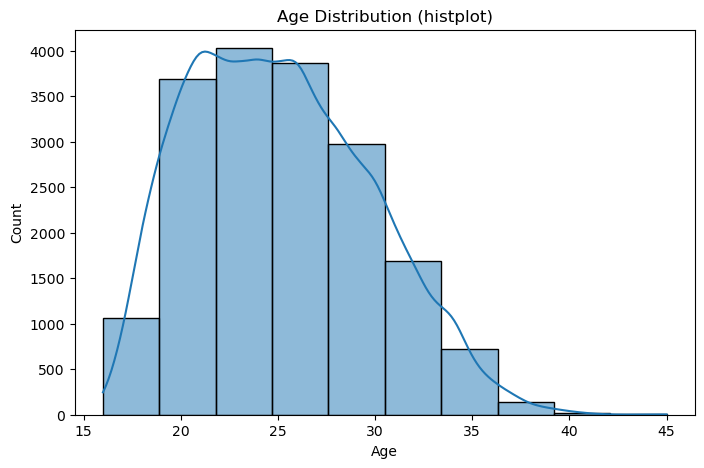

In [3]:
# 2. Age Distribution(Histplot)
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution (histplot)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

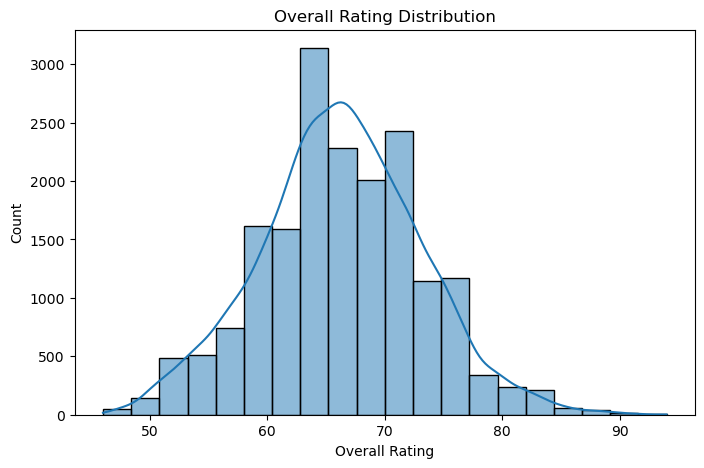

In [6]:
# 3. Overall Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Overall'], bins=20, kde=True)
plt.title("Overall Rating Distribution")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()

In [7]:
# Convert 'Value' column to numerical format
def convert_value(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('M', 'e6').replace('K', 'e3')
        try:
            return float(eval(value))
        except:
            return np.nan
    return value
df['Value'] = df['Value'].apply(convert_value)

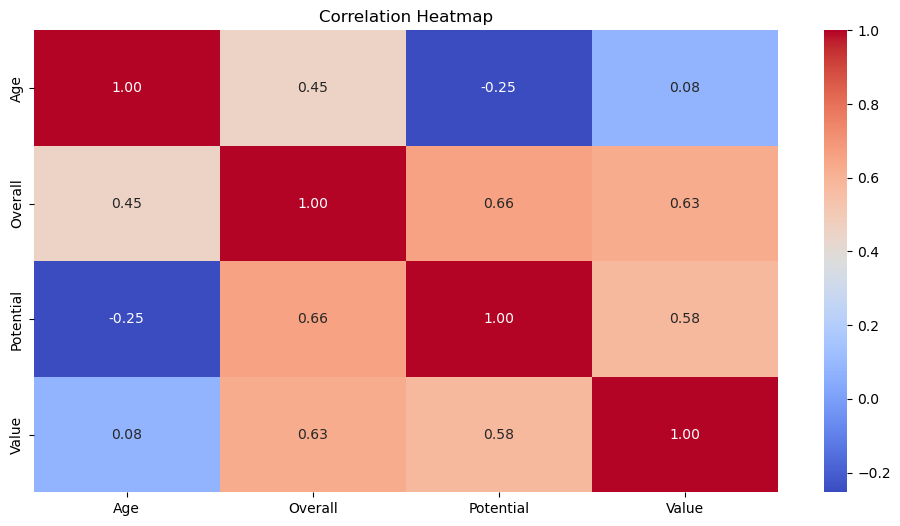

In [8]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

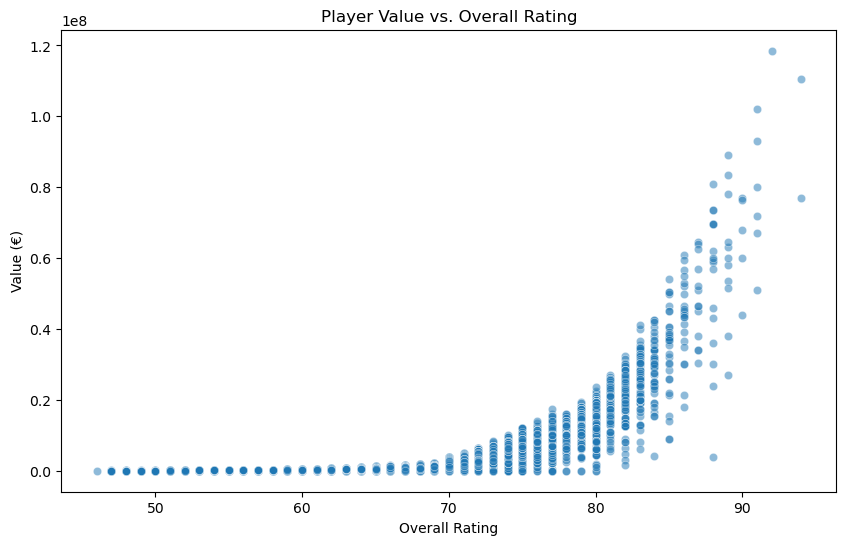

In [9]:
# 5. Scatter Plot: Player Value vs. Overall Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Overall'], y=df['Value'], alpha=0.5)
plt.title("Player Value vs. Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Value (€)")
plt.show()

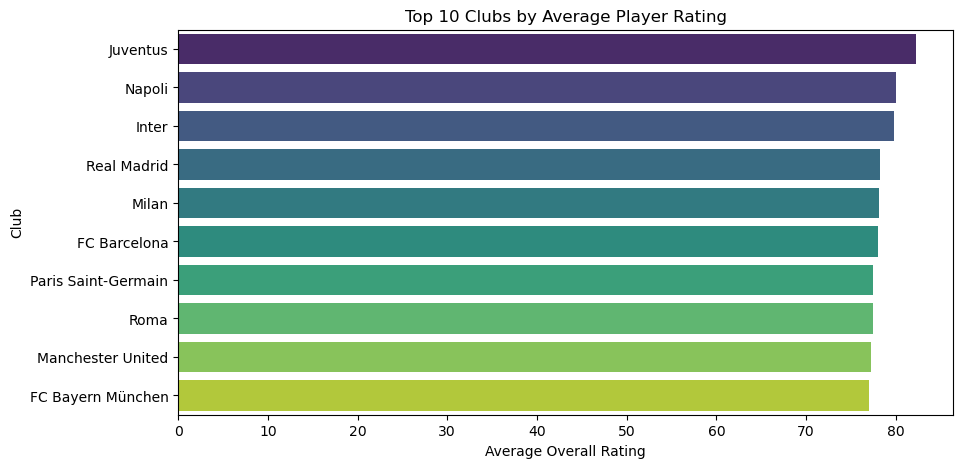

In [10]:
# 6. Top 10 Clubs by Average Player Rating
top_clubs = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='viridis')
plt.title("Top 10 Clubs by Average Player Rating")
plt.xlabel("Average Overall Rating")
plt.ylabel("Club")
plt.show()

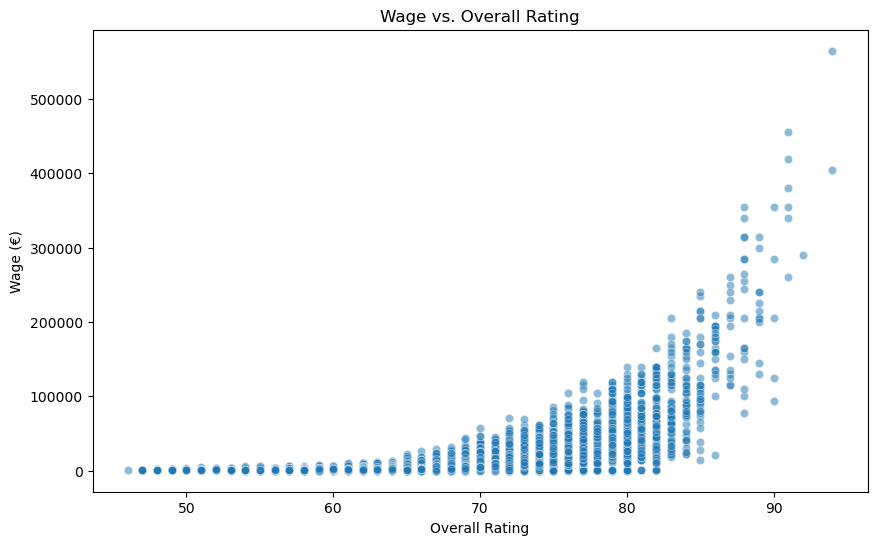

In [11]:
# 7. Wage vs. Overall Rating
plt.figure(figsize=(10, 6))
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('K', 'e3')
df['Wage'] = df['Wage'].apply(pd.to_numeric, errors='coerce')
sns.scatterplot(x=df['Overall'], y=df['Wage'], alpha=0.5)
plt.title("Wage vs. Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Wage (€)")
plt.show()

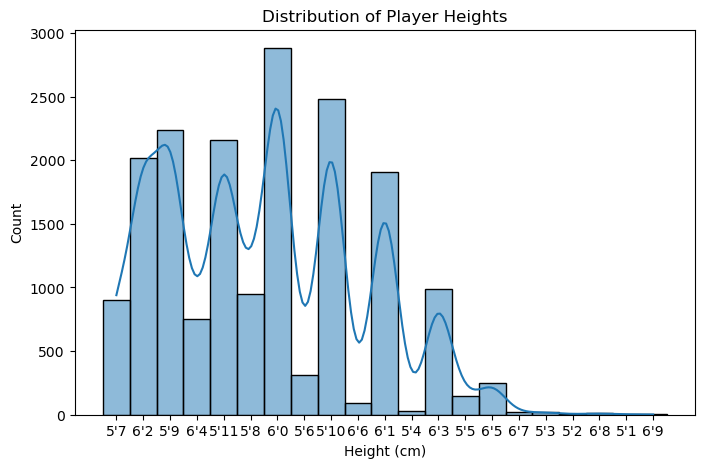

In [12]:
# 8. Distribution of Player Heights
plt.figure(figsize=(8, 5))
sns.histplot(df['Height'], bins=20, kde=True)
plt.title("Distribution of Player Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

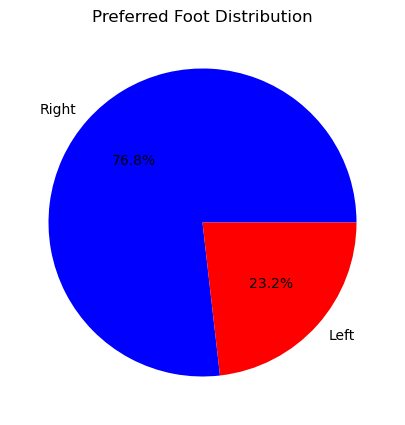

In [16]:
# 9. Preferred Foot Distribution
plt.figure(figsize=(8, 5))
foot_counts = df['Preferred Foot'].dropna().value_counts()
plt.pie(foot_counts.values, labels=foot_counts.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Preferred Foot Distribution")
plt.show()

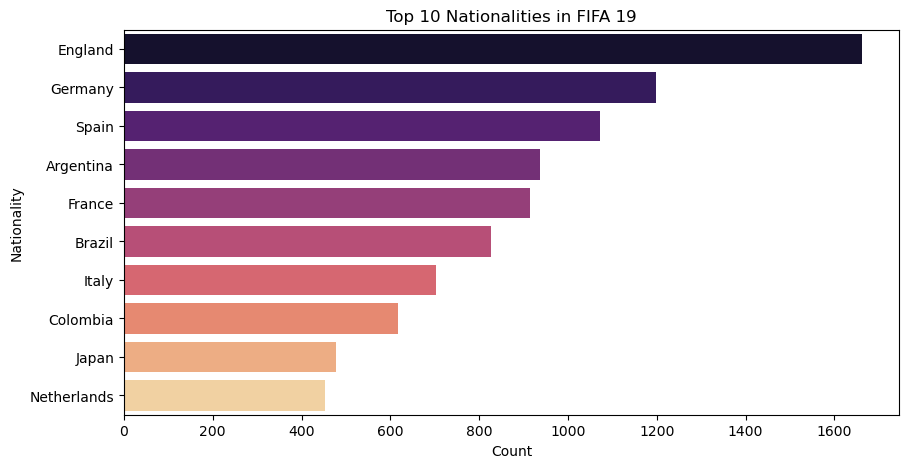

In [22]:
# 10. Nationality Distribution (Top 10 Countries)
top_nationalities = df['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='magma')
plt.title("Top 10 Nationalities in FIFA 19")
plt.xlabel("Count")
plt.ylabel("Nationality")
plt.show()

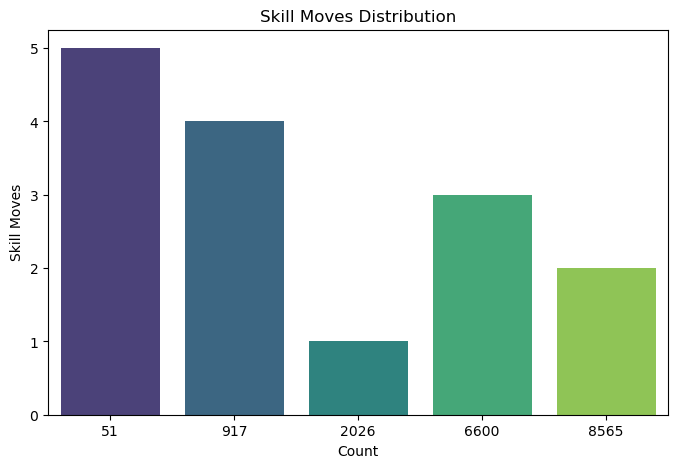

In [21]:
# 11. Players' Skill Moves Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Skill Moves'].value_counts().values, y=df['Skill Moves'].value_counts().index, palette='viridis')
plt.title("Skill Moves Distribution")
plt.xlabel("Count")
plt.ylabel("Skill Moves")
plt.show()


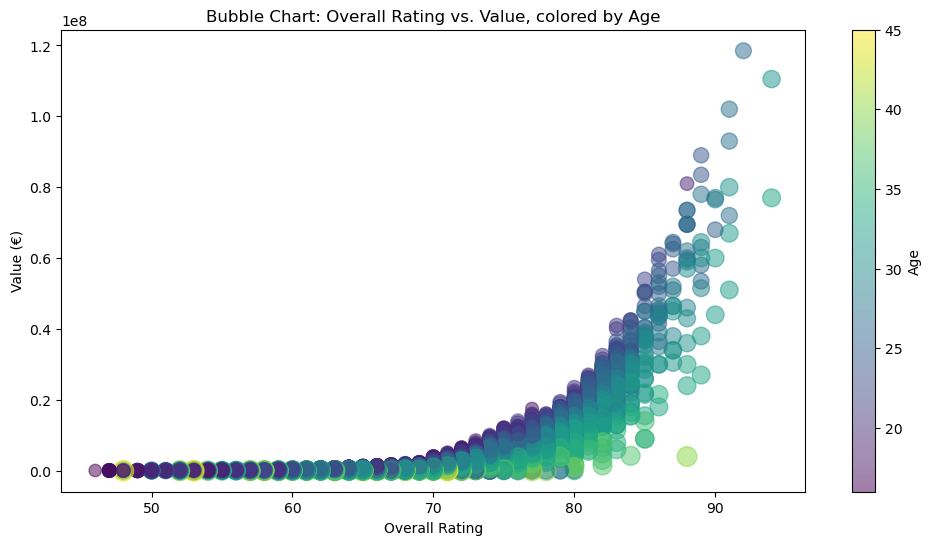

In [26]:
# 12. Bubble Chart: Overall Rating vs. Value, colored by Age
plt.figure(figsize=(12, 6))
plt.scatter(df['Overall'], df['Value'], s=df['Age']*5, alpha=0.5, c=df['Age'], cmap='viridis')
plt.colorbar(label='Age')
plt.title("Bubble Chart: Overall Rating vs. Value, colored by Age")
plt.xlabel("Overall Rating")
plt.ylabel("Value (€)")
plt.show()